<a href="https://colab.research.google.com/github/phacUFPE/quantum-bernstein-vazirani/blob/prod/Bernstein_Vazirani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Algoritmo de Bernstein-Vazirani**



---

## Grupo

- Artur Carvalho dos Santos (acs9)
- Gustavo Carvalho Campos (gcc2)
- José Lucas Correia Acioly (jlca)
- Lucas Oliveira Cavalcanti (loc)
- Pedro Henrique Alves Cruz (phac)

---

## Teoria

### Sobre o Algoritmo

> O algoritmo de Bernstein-Vazirani resolve o problema de Bernstein-Vazirani. Esse problema é uma versão restrita do algoritmo de Deutsch-Jozsa, onde, ao invés de ele tentar diferenciar duas classes de funções (balanceada ou constante), ele tenta descobrir uma string decodificada em uma função.

---











### Enunciado do problema

Dado um [óraculo](https://pt.wikipedia.org/wiki/M%C3%A1quina_or%C3%A1culo) que implemente a função:

**_f: {0, 1}<sup>n</sup> -> {0, 1}_**

onde **_f(x)_** promete ser o produto escalar entre **_x_** e uma string secreta **s ∈ {0,1}<sup>n</sup> mod 2, f(x) = x • s = x<sub>1</sub>s<sub>1</sub> ⊗ x<sub>2</sub>s<sub>2</sub> ⊗ . . . ⊗ x<sub>n</sub>s<sub>n</sub>**, ache **s**.

Portanto, ao invés de uma função ser balanceada ou constante, como no problema de Deutsch-Jozsa, agora, a função retorna o produto da entrada com uma string **_s_** bit a bit. O circuito clássico é o seguinte:

![bv2.png](https://learn.qiskit.org/content/v2/ch-algorithms/images/bv2.png)


---
### A Solução Clássica

Dado uma entrada **x**, o oráculo retorna:

**f<sub>s</sub>(x) = s • x mod 2**

Assim, a string de bits secreta **s** pode ser revelada apenas testando no oráculo a seguinte sequência de entradas:

```
100...0
010...0
001...0
000...1
```

Ou seja, se fizermos **x** = 100...0, e aplicarmos **s • x mod 2** - multiplicando bit a bit e, em seguida fazendo o módulo 2 - podemos descobrir o bit menos significante da nossa string resultante. Se fizermos **x** = 010...0, podemos descobrir o segundo bit menos significativo e assim por diante.

Dessa forma, em uma string de tamanho **_n_**, a função **f<sub>s</sub>(x)** é chamada **n** vezes.

#### O que há no oráculo?

>
>O oráculo precisa fazer 4 coisas:
1. Conter uma string de n bits aleatória
2. Receber 2 entradas, a Query e um Auxiliar
3. Calcular o produto interno da string escondida e da Query mod 2 sem afetar a Query, e atribuir esse resultado ao Auxiliar
4. Retorna a Query e o novo Auxiliar

### Exemplo Clássico

Vamos usar como exemplo a string binária escondida '01101' e nossa Query sendo '10101'.

Como faremos para mapear esses vetores? Basicamente tudo que temos que fazer é pegar cada dígito binário como um elemento e multiplicar os vetores depois.

Por fim, multiplicar cada elemento e depois realizar uma soma geral para obter o resultado.

-

![imagem](https://miro.medium.com/v2/resize:fit:828/format:webp/0*wc1T3t1ZnYtN6jBP.png)

<img src="https://rpgalacarte.com.br/wp-content/uploads/2021/02/arrow-down.gif" alt="drawing" width="200"/>

![imagem](https://miro.medium.com/v2/resize:fit:720/format:webp/1*7B5DtesXAX8iAXt5xEegFA.png)

-

---

####A forma de resolver classicamente é testando cada bit separadamente. No caso de um número com 3 bits testar com [001, 010, 100], o que equivale a testar uma base da matriz identidade, e o seu resultado será a string binária escondida.

-

<img src="https://informacaoquantica.files.wordpress.com/2020/12/resposta.jpg" alt="drawing" width="500"/>


---
### A Solução Quântica

Em um computador quântico, esse problema pode ser resolvido com 100% de acerto após apenas uma chamada da função **f(x)**.

O algoritmo tem poucos passos, são eles:


1. Inicialize os qubits de entrada para o estado |0⟩<sup>⊗n</sup> e o qubit de saída para o estado |–⟩
2. Aplique portas Hadamard ao registrador de entrada
3. Mande para o oráculo
4. Aplique portas Hadamard ao registrador de entrada
5. Realize a **medição**


#### Demonstração
1. Primeiramente, aplicando a porta H a cada qubit, vamos obter uma superposição de estados. Em particular, se utilizarmos |00...0⟩ e aplicarmos n portas Hadamard a ele, obteremos a seguinte superposição quântica conhecida:

  ![cod1](https://media.discordapp.net/attachments/1103114092014735405/1150929709518049300/cod1.png)

2. O oráculo clássico **f<sub>s</sub>** retorna 1 para qualquer entrada x tal que **s • x mod 2**, e retorna 0 caso contrário.
  
  ![cod2](https://media.discordapp.net/attachments/1103114092014735405/1150931396269969408/cod2.png)

3. O algoritmo para descobrir a string vazia funciona aplicando a superposição que obtivemos da transformação Hadamard de |00...0⟩ ao oráculo **f<sub>s</sub>**.

  ![cod3](https://media.discordapp.net/attachments/1103114092014735405/1150931396525834281/cod3_.png)

  * considere que **_a_** é a string de entrada

4. Como sabemos, a inversa de **_n_** portas Hadmard é, também, **_n_** portas Hadamard. Assim, podemos obter a string **_a_** resultante aplicando Hadamard a nossa superposição anterior.
  
  ![cod4](https://media.discordapp.net/attachments/1103114092014735405/1150931396735541299/cod4.png)


---

### Exemplo Quântico

####Vamos seguir o exemplo que tem como a quantidade de qubits: **_n = 2_**, e a string binária escondida: **_s = 11_**.  

-

![image](https://cdn.discordapp.com/attachments/1103114092014735401/1150946628258250802/image.png)

### Referências



* [Bernstein-Vazirani Algorithm - Qiskit](https://learn.qiskit.org/course/ch-algorithms/bernstein-vazirani-algorithm)

* [Gunzi, Arnaldo - Implementação do problema de Bernstein-Vazirani no Qiskit](https://informacaoquantica.wordpress.com/2020/12/12/implementacao-do-problema-de-bernstein-vazirani-no-qiskit/#:~:text=O%20problema%20de%20Bernstein%2DVazirani,a%20bit%20entre%20duas%20strings.)

* [Biswas, Shrey - The Bernstein-Vazirani Algorithm: Quantum Algorithms Untangled](https://medium.com/quantum-untangled/the-bernstein-vazirani-algorithm-quantum-algorithms-untangled-67e58d4a5096)

* [Larose, Ryan - The Bernstein-Vazirani Algorithm](https://www.ryanlarose.com/uploads/1/1/5/8/115879647/bv-algorithm.pdf)

---

## Código

### Instalações

In [ ]:
!pip install qiskit ipywidgets

In [ ]:
!pip install qiskit-aer

In [ ]:
!pip install qiskit_ibm_runtime

In [ ]:
!pip install pylatexenc

### Preparação

In [ ]:
import asyncio

from time import sleep
from threading import Thread
from typing import Dict, List, Optional

# initialization
import matplotlib.pyplot as plt

import numpy as np

# importing Qiskit
from qiskit import assemble, ClassicalRegister, QuantumCircuit, QuantumRegister, transpile
from qiskit.visualization import plot_histogram
from qiskit.providers.aer import Aer
from qiskit_ibm_runtime import IBMBackend, Options, QiskitRuntimeService, Sampler

# import basic plot tools
from qiskit.visualization import plot_histogram

In [ ]:
# Variaveis de servico IBM
token = "c01f13d1a10a36997cf3ba9a1bf9be5097f3dccc504bceaceb34cbdc5c24e07f818f3ccff807366c2f0e5904d7d519cf3b8d373b63f80a770e12a6195393591c"

# Inicializando o servico backend IBM
service = QiskitRuntimeService(channel="ibm_quantum", token=token)

options = Options(optimization_level=1)

In [ ]:
# Defina a string binária escondida aqui (e.g., '101010').
# hidden_string = '101010' # DEC = 42, HEX = 2A
dinamical_hidden_strings = [
    '10111',        # DEC = 23, HEX = 17
    '101',          # DEC = 5, HEX = 5
    '101101',    # DEC = 45, HEX = 2D
    '10',           # DEC = 2, HEX = 2
    '1111'      # DEC = 15, HEX = F
]

In [ ]:
def convert_result_to_binary(result: dict[str, int], source_type: Optional[str]='bin') -> dict[str, int]:
  new_result = {}
  for key, value in result.items():
    if source_type == 'hex':
      key = int(key, 16)
    new_result[bin(key)[2:]] = value

  return new_result

In [ ]:
def bubble_sort(backends: List[IBMBackend]) -> List[IBMBackend]:
  for passnum in range(len(backends)-1, 0, -1):
    for i in range(passnum):
      if backends[i].status().pending_jobs > backends[i+1].status().pending_jobs:
        temp = backends[i]
        backends[i] = backends[i+1]
        backends[i+1] = temp
  return backends

In [ ]:
def get_backends_with_less_pending_jobs(backends: List[IBMBackend]) -> List[IBMBackend]:
  return bubble_sort(backends)[:5]

In [ ]:
# Prepara e retornas os backends ajustados para o problema
def prepare_backends(service: QiskitRuntimeService, string_size: int) -> List[IBMBackend]:
  qubits_needed_amount = string_size + 1

  backends = service.backends(simulator=False, operational=True, min_num_qubits=qubits_needed_amount)

  return get_backends_with_less_pending_jobs(backends)


In [ ]:
def bernstein_vazirani_algorithm(hidden_string: str) -> QuantumCircuit:
    binarySize = len(hidden_string)

    # Criar um circuito quantico com n+1 qbits sendo um deles um qbit auxiliar
    # Precisamos de n bits classicos auxiliares para escrever o output
    Q_circuit = QuantumCircuit(binarySize+1, binarySize)

    # Colocar o qbit auxiliar no estado |->
    Q_circuit.h(binarySize)
    Q_circuit.z(binarySize)


    # Passo 1: Aplique a porta de Hadamard para todos os qubits antes de consultar o oraculo
    for i in range(binarySize):
        Q_circuit.h(i)

    # Barreira
    Q_circuit.barrier()

    # Passo 2: Aplique a função do oracle que codifica o string binário escondido.
    # A função oracle é implementada usando portas CNOT controlados pela string escondida.
    s = hidden_string[::-1]
    for q in range(binarySize):
      if s[q] == '0':
          Q_circuit.i(q)
      else:
          Q_circuit.cx(q, binarySize)

    # Barreira
    Q_circuit.barrier()

    # Passo 3: Aplique a porta de Hadamar novamente para o input de qubits.
    for i in range(binarySize):
      Q_circuit.h(i)


    # Passo 4: Meça o input de qubits.
    for i in range(binarySize):
      Q_circuit.measure(i, i)

    return Q_circuit

In [ ]:
def simulate_circuit(Q_circuit: QuantumCircuit) -> Dict[str, int]:
  # Simule p circuito usando o simulador de qasm.
  simulator = Aer.get_backend('qasm_simulator')
  TQ_circuit = transpile(Q_circuit, simulator)
  quantumObject = assemble(TQ_circuit)
  result = simulator.run(quantumObject).result()
  counts = result.get_counts(Q_circuit)
  return result

In [ ]:
async def run_backend_with_circuit(backend: IBMBackend, circuit_object: object) -> object:
  sampler = Sampler(backend=backend, options=options)

  job = sampler.run(circuits=circuit_object['circuit'])

  result_object = {
          'hidden_string': circuit_object['name'],
          'backend': backend.name,
          'result': job.result()
      }

  return result_object

### Envio dos circuitos a IBM

Rodar somente caso nao tiver nenhum job executado.

**(Ja existem jobs executados e alguns pendentes)**

In [ ]:
# Rodando o circuito nos 5 backends mais disponiveis

try:
    loop = asyncio.get_running_loop()
except RuntimeError:  # 'RuntimeError: There is no current event loop...'
    loop = None

ibm_results = []

circuits = []

for index, hidden_string in enumerate(dinamical_hidden_strings):
  circuit = bernstein_vazirani_algorithm(hidden_string)

  circuit_object = {'name': hidden_string, 'circuit': circuit}

  circuits.append(circuit_object)

  backends = prepare_backends(service, len(hidden_string))

  if not backends:
    print(f'No backend available for the string {hidden_string} that has {len(hidden_string) + 1} qubits')

  for backend in backends:
    ibm_results.append(
      asyncio.run(run_backend_with_circuit(backend, circuits[index]))
      if not loop
      else loop.create_task(run_backend_with_circuit(backend, circuits[index]))
  )

---
## Plots

### Circuitos

In [ ]:
def draw_circuit(circuit_obj: object, position: Optional[int] = 6, height: Optional[int] = 0.8):
  fig = plt.figure()

  ax = fig.add_subplot()

  ax.text(position, height, circuit_obj['name'], size=14)
  circuit_obj['circuit'].draw(output='mpl', ax=ax)

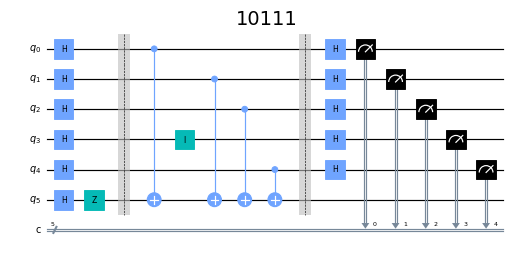

In [ ]:
draw_circuit(circuits[0], 5.5)

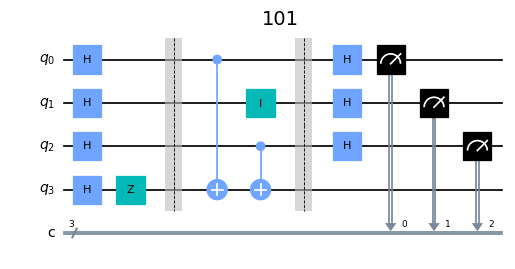

In [ ]:
draw_circuit(circuits[1], 3.8)

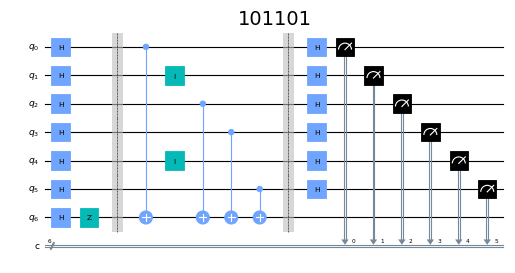

In [ ]:
draw_circuit(circuits[2])

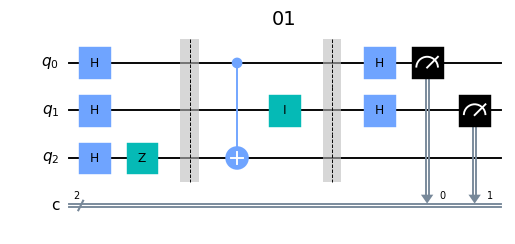

In [ ]:
draw_circuit(circuits[3], 3.5)

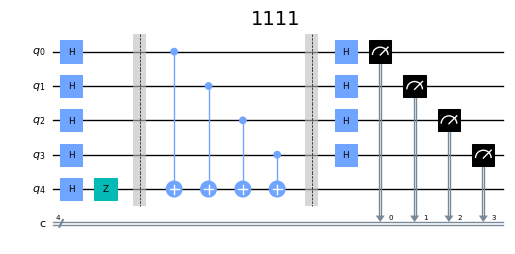

In [ ]:
draw_circuit(circuits[4], 5)

### Resultados

#### Simulação

<ipython-input-12-2cb3cd3f3f57>:6: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = simulator.run(quantumObject).result()


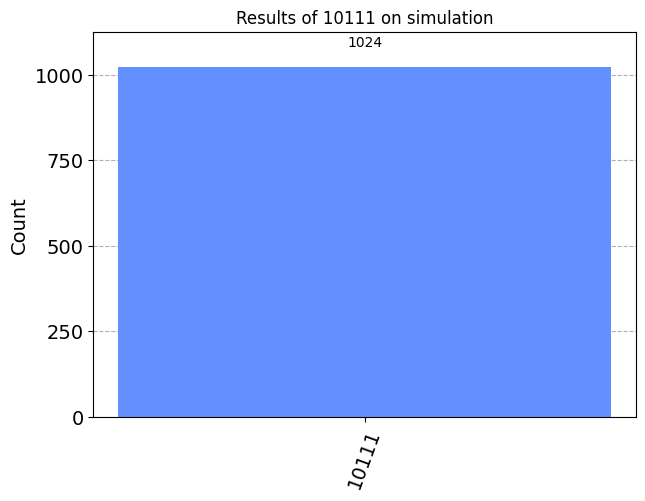

In [ ]:
result = simulate_circuit(bernstein_vazirani_algorithm(dinamical_hidden_strings[0]))

plot_histogram(
    title=f'Results of {dinamical_hidden_strings[0]} on simulation',
    data=convert_result_to_binary(result.results[0].data.counts, 'hex')
)

<ipython-input-12-2cb3cd3f3f57>:6: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = simulator.run(quantumObject).result()


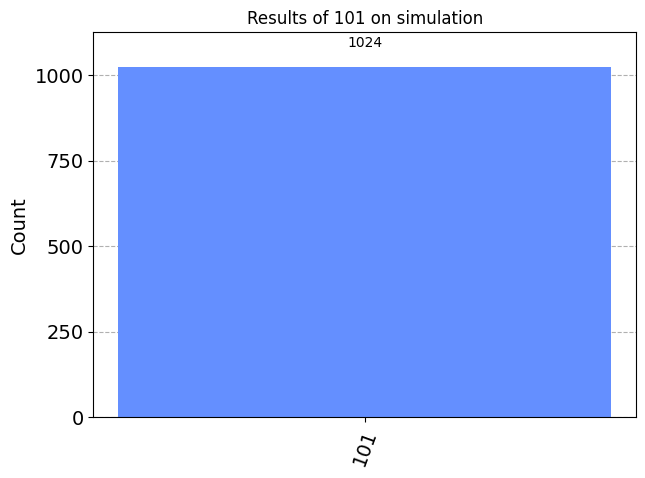

In [ ]:
result = simulate_circuit(bernstein_vazirani_algorithm(dinamical_hidden_strings[1]))

plot_histogram(
    title=f'Results of {dinamical_hidden_strings[1]} on simulation',
    data=convert_result_to_binary(result.results[0].data.counts, 'hex')
)

<ipython-input-12-2cb3cd3f3f57>:6: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = simulator.run(quantumObject).result()


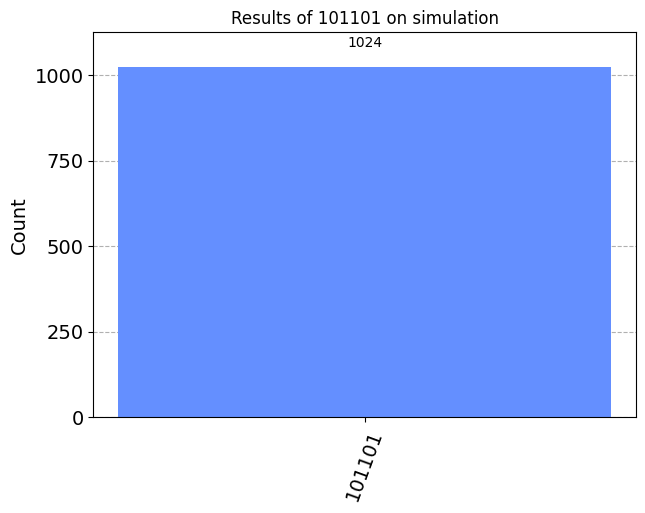

In [ ]:
result = simulate_circuit(bernstein_vazirani_algorithm(dinamical_hidden_strings[2]))

plot_histogram(
    title=f'Results of {dinamical_hidden_strings[2]} on simulation',
    data=convert_result_to_binary(result.results[0].data.counts, 'hex')
)

<ipython-input-12-2cb3cd3f3f57>:6: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = simulator.run(quantumObject).result()


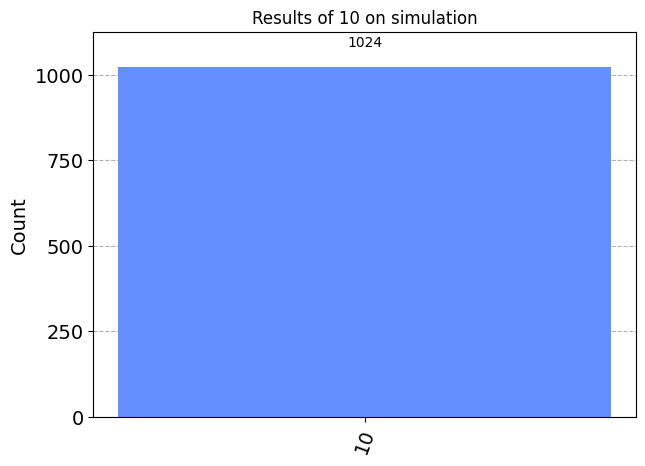

In [ ]:
result = simulate_circuit(bernstein_vazirani_algorithm(dinamical_hidden_strings[3]))

plot_histogram(
    title=f'Results of {dinamical_hidden_strings[3]} on simulation',
    data=convert_result_to_binary(result.results[0].data.counts, 'hex')
)

<ipython-input-12-2cb3cd3f3f57>:6: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = simulator.run(quantumObject).result()


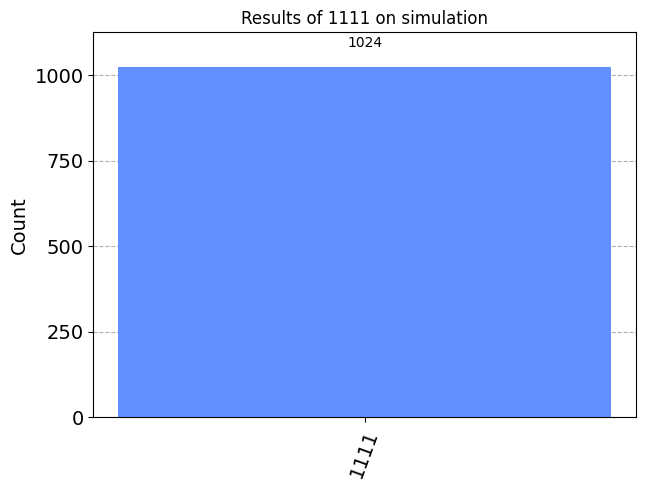

In [ ]:
result = simulate_circuit(bernstein_vazirani_algorithm(dinamical_hidden_strings[4]))

plot_histogram(
    title=f'Results of {dinamical_hidden_strings[4]} on simulation',
    data=convert_result_to_binary(result.results[0].data.counts, 'hex')
)

#### Real

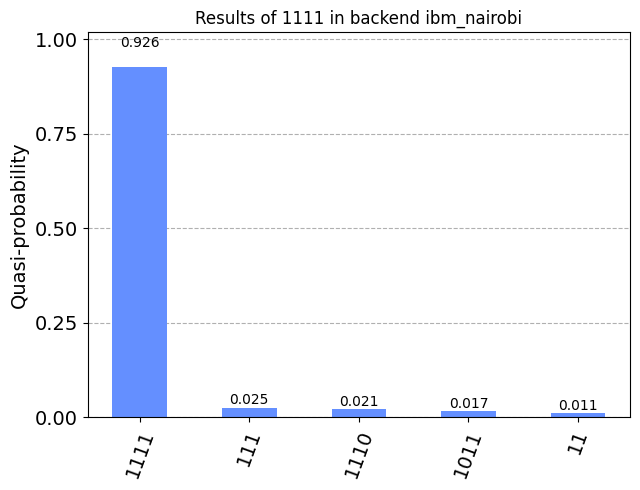

In [ ]:
# plot_index = 0

# plot_hidden_string = ibm_results[plot_index].result()["hidden_string"]
# plot_backend = ibm_results[plot_index].result()["backend"]
# plot_result = convert_result_to_binary(ibm_results[plot_index].result()['result'].quasi_dists[0])

# plot_histogram(
#     title=f'Results of {plot_hidden_string} backend {plot_backend}',
#     data=plot_result,
#     sort='value_desc',
#     number_to_keep=5
# )

job = service.job('ck3s512dijuadeu8ph5g')

plot_backend = job.backend().name
plot_result = convert_result_to_binary(job.result().quasi_dists[0])

plot_histogram(
    title=f'Results of 1111 in backend {plot_backend}',
    data=plot_result,
    sort='value_desc',
    number_to_keep=5
)

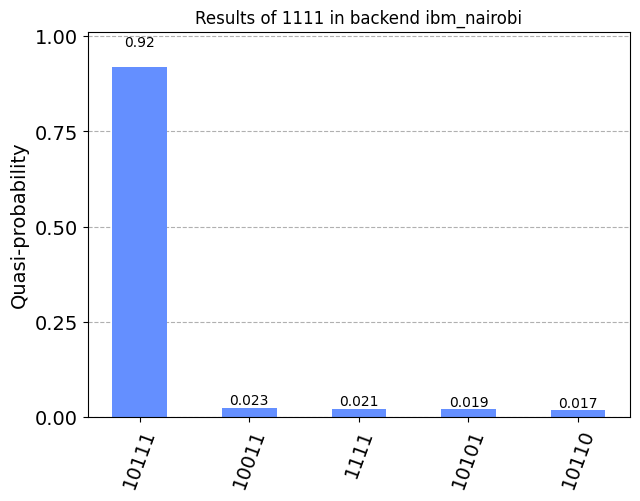

In [ ]:
# plot_index = 1

# plot_hidden_string = ibm_results[plot_index].result()['hidden_string']
# plot_backend = ibm_results[plot_index].result()['backend']
# plot_result = convert_result_to_binary(ibm_results[plot_index].result()['result'].quasi_dists[0])

# plot_histogram(
#     title=f'Results of {plot_hidden_string} on backend {plot_backend}',
#     data=plot_result,
#     sort='value_desc',
#     number_to_keep=5
# )

job = service.job('ck3sp3t1r6vdfs4najeg')

plot_backend = job.backend().name
plot_result = convert_result_to_binary(job.result().quasi_dists[0])

plot_histogram(
    title=f'Results of 1111 in backend {plot_backend}',
    data=plot_result,
    sort='value_desc',
    number_to_keep=5
)

In [ ]:
plot_index = 2

plot_hidden_string = ibm_results[plot_index].result()['hidden_string']
plot_backend = ibm_results[plot_index].result()['backend']
plot_result = convert_result_to_binary(ibm_results[plot_index].result()['result'].quasi_dists[0])

plot_histogram(
    title=f'Results of {plot_hidden_string} in backend {plot_backend}',
    data=plot_result,
    sort='value_desc',
    number_to_keep=5
)

In [ ]:
plot_index = 3

plot_hidden_string = ibm_results[plot_index].result()['hidden_string']
plot_backend = ibm_results[plot_index].result()['backend']
plot_result = convert_result_to_binary(ibm_results[plot_index].result()['result'].quasi_dists[0])

plot_histogram(
    title=f'Results of {plot_hidden_string} in backend {plot_backend}',
    data=plot_result,
    sort='value_desc',
    number_to_keep=5
)

In [ ]:
plot_index = 4

plot_hidden_string = ibm_results[plot_index].result()['hidden_string']
plot_backend = ibm_results[plot_index].result()['backend']
plot_result = convert_result_to_binary(ibm_results[plot_index].result()['result'].quasi_dists[0])

plot_histogram(
    title=f'Results of {plot_hidden_string} in backend {plot_backend}',
    data=plot_result,
    sort='value_desc',
    number_to_keep=5
)

In [ ]:
plot_index = 5

plot_hidden_string = ibm_results[plot_index].result()['hidden_string']
plot_backend = ibm_results[plot_index].result()['backend']
plot_result = convert_result_to_binary(ibm_results[plot_index].result()['result'].quasi_dists[0])

plot_histogram(
    title=f'Results of {plot_hidden_string} in backend {plot_backend}',
    data=plot_result,
    sort='value_desc',
    number_to_keep=5
)

In [ ]:
plot_index = 6

plot_hidden_string = ibm_results[plot_index].result()['hidden_string']
plot_backend = ibm_results[plot_index].result()['backend']
plot_result = convert_result_to_binary(ibm_results[plot_index].result()['result'].quasi_dists[0])

plot_histogram(
    title=f'Results of {plot_hidden_string} in backend {plot_backend}',
    data=plot_result,
    sort='value_desc',
    number_to_keep=5
)

In [ ]:
plot_index = 7

plot_hidden_string = ibm_results[plot_index].result()['hidden_string']
plot_backend = ibm_results[plot_index].result()['backend']
plot_result = convert_result_to_binary(ibm_results[plot_index].result()['result'].quasi_dists[0])

plot_histogram(
    title=f'Results of {plot_hidden_string} in backend {plot_backend}',
    data=plot_result,
    sort='value_desc',
    number_to_keep=5
)

In [ ]:
plot_index = 8

plot_hidden_string = ibm_results[plot_index].result()['hidden_string']
plot_backend = ibm_results[plot_index].result()['backend']
plot_result = convert_result_to_binary(ibm_results[plot_index].result()['result'].quasi_dists[0])

plot_histogram(
    title=f'Results of {plot_hidden_string} in backend {plot_backend}',
    data=plot_result,
    sort='value_desc',
    number_to_keep=5
)

In [ ]:
plot_index = 9

plot_hidden_string = ibm_results[plot_index].result()['hidden_string']
plot_backend = ibm_results[plot_index].result()['backend']
plot_result = convert_result_to_binary(ibm_results[plot_index].result()['result'].quasi_dists[0])

plot_histogram(
    title=f'Results of {plot_hidden_string} in backend {plot_backend}',
    data=plot_result,
    sort='value_desc',
    number_to_keep=5
)

In [ ]:
plot_index = 10

plot_hidden_string = ibm_results[plot_index].result()['hidden_string']
plot_backend = ibm_results[plot_index].result()['backend']
plot_result = convert_result_to_binary(ibm_results[plot_index].result()['result'].quasi_dists[0])

plot_histogram(
    title=f'Results of {plot_hidden_string} in backend {plot_backend}',
    data=plot_result,
    sort='value_desc',
    number_to_keep=5
)

In [ ]:
plot_index = 11

plot_hidden_string = ibm_results[plot_index].result()['hidden_string']
plot_backend = ibm_results[plot_index].result()['backend']
plot_result = convert_result_to_binary(ibm_results[plot_index].result()['result'].quasi_dists[0])

plot_histogram(
    title=f'Results of {plot_hidden_string} in backend {plot_backend}',
    data=plot_result,
    sort='value_desc',
    number_to_keep=5
)

In [ ]:
plot_index = 12

plot_hidden_string = ibm_results[plot_index].result()['hidden_string']
plot_backend = ibm_results[plot_index].result()['backend']
plot_result = convert_result_to_binary(ibm_results[plot_index].result()['result'].quasi_dists[0])

plot_histogram(
    title=f'Results of {plot_hidden_string} in backend {plot_backend}',
    data=plot_result,
    sort='value_desc',
    number_to_keep=5
)

In [ ]:
plot_index = 13

plot_hidden_string = ibm_results[plot_index].result()['hidden_string']
plot_backend = ibm_results[plot_index].result()['backend']
plot_result = convert_result_to_binary(ibm_results[plot_index].result()['result'].quasi_dists[0])

plot_histogram(
    title=f'Results of {plot_hidden_string} in backend {plot_backend}',
    data=plot_result,
    sort='value_desc',
    number_to_keep=5
)

In [ ]:
plot_index = 14

plot_hidden_string = ibm_results[plot_index].result()['hidden_string']
plot_backend = ibm_results[plot_index].result()['backend']
plot_result = convert_result_to_binary(ibm_results[plot_index].result()['result'].quasi_dists[0])

plot_histogram(
    title=f'Results of {plot_hidden_string} in backend {plot_backend}',
    data=plot_result,
    sort='value_desc',
    number_to_keep=5
)